# Análise de Dados Meteorológicos
Caracterizar a meteorologia do lugar, não só da superfície, mas de sondagem para obter o perfil de temperatura.

## Caracterizaçao Meteorológica
* Meteorologia de superfície (estação meteorológica);
* Perfil vertical da atmosfesta (sondagem).

Precisamos saber os dois em conjunto, para conseguir as informações de:
1) Direção do transporte de poluentes: para saber para onde a pluma está indo.
2) Turbulência mecânica e convectiva: para saber o comportamento da pluma, como o poluente se espalha.
3) Camada poluente: para saber aonde vai se dispersar.

Obs: Precisamos também saber das propriedades do solo, para ver como se comporta recebendo a radiação solar, se esquenta mais ou menos.

Caracterização da superfície:
* Albedo;
* Razão Bower;
* Rugosidade.

Dados necessários:
* Estação meteorológica convencional;
* Sondagem atmosférica.

Obs: Como obter acesso a esses dados? Todos os dados de aeroportos do Brasil cadastrados, compilando meteorologia de superfície desses locais.

Requisitos para meteorologia de superfície - estação meteorológica (medição estática):
* Dados de temperatura;
* Pressão atmosférica;
* Velocidade do vento;
* Direção do vento;
* Umidade;
* Cobertura de nuvens;

Requisitos sondagem (medição conforme vai subindo o balão):
* Temperatura;
* Pressão;
* Velocidade do vento;
* Direção do vento.

Sondagem só existe em aeroporto, então para locais que não possuem aeroporto, podemos:
* Utilizar os dados do aeroporto mais próximos;
* Procurar cruzar dados com locais com características de altitude e climáticas parecidas;

Obs: Recomenda-se utilizar os dados de um modelo meteorológico para saber as condições atmosféricas do local.

**Pontos mais importantes: perfil de temperatura, meteorologia de superfície e caracterização da superfície.**

## Utilizar a plataforma do prof para baixar esses dados: 


wd: direção do vento
ws: velocidade do vento
hc: altura da cobertura de nuvens
cop: cobertura de nuvens
relh: umidade relativa

# Caracterização meteorlógica da área em estudo
Autor: Suelen Silva Oliveira

Nesta atividade caracterizaremos a meteorologia da área em estudo. Avaliaremos os seguintes pontos:
1) Meteorologia de superfície
2) Meteorologia upperair ou sondagem/perfil da atmosfera
3) Superfície - Albedo, razão de Bowen e Rugosidade

## Metorologia de superfície
Analisaremos os dados de metar (estação meteorlógicas de aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR \
(BRAIN -> Get METAR -> Estação de Florianópolis)

Coletar dados para o período de 01/01/2023 a 01/01/2024 e 01/01/2022 a 01/01/2023.

Obs:
* Colocar os dados na pasta de inputs em nova pasta "meteoSuperficie"
* Nomenclatura da "metar_2023.csv"

In [14]:
# Selecionar arquivo para a análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath + '\\inputs\\meteoSuperficie'
print (metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

r'C:\Users\vinicius\Documents\ENS5173_202401'
r'C:\Users\vinicius\Documents\ENS5173_202401\inputs\meteoSuperficie'

C:\Users\vinicius\Documents\ENS5173_202401
C:\Users\vinicius\Documents\ENS5173_202401\inputs\meteoSuperficie
['metar_2021.csv', 'metar_2022.csv', 'metar_2023.csv']


'C:\\Users\\vinicius\\Documents\\ENS5173_202401\\inputs\\meteoSuperficie'

In [15]:
# Abrindo os arquivos metar
import pandas as pd

metSuperficie = []
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2021     0 NaN  190.0  3.601108   914.4  6.0  6.0   
1       1      1  2021     1 NaN  190.0  4.115552   914.4  6.0  6.0   
2       1      1  2021     2 NaN  180.0  5.658884   914.4  6.0  6.0   
3       1      1  2021     3 NaN  190.0  4.115552   914.4  6.0  6.0   
4       1      1  2021     4 NaN  190.0  4.629996   914.4  3.0  3.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.665616  23.0    21.0  NaN  0.0  88.51  
1     1009.662022  23.0    20.0  NaN  0.0  83

In [16]:
# Criar uma coluna com DateTime dos dados

#Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day','hour']])
print(metSuperficie['datetime'])          

metSuperficie.set_index(metSuperficie['datetime'])

0      2021-01-01 00:00:00
1      2021-01-01 01:00:00
2      2021-01-01 02:00:00
3      2021-01-01 03:00:00
4      2021-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 26251, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,1,1,2021,0,NaN,190.0,3.601108,914.4,6.0,6.0,1009.665616,23.0,21.0,NaN,0.0,88.51,2021-01-01 00:00:00
2021-01-01 01:00:00,1,1,2021,1,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,23.0,20.0,NaN,0.0,83.21,2021-01-01 01:00:00
2021-01-01 02:00:00,1,1,2021,2,NaN,180.0,5.658884,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 02:00:00
2021-01-01 03:00:00,1,1,2021,3,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 03:00:00
2021-01-01 04:00:00,1,1,2021,4,NaN,190.0,4.629996,914.4,3.0,3.0,1009.662022,22.0,19.0,NaN,0.0,83.09,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


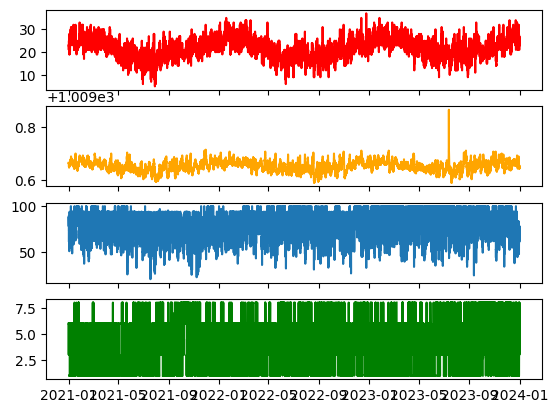

In [23]:
# Analisando os dados através de figuras
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(metSuperficie['datetime'], metSuperficie['temp'], color = 'red')
ax[1].plot(metSuperficie['datetime'], metSuperficie['p'], color = 'orange')
ax[2].plot(metSuperficie['datetime'], metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'], metSuperficie['cco'], color = 'green')

# ax[3].tick_params(axis=0, x=4) # -> ver como faz a rotação de eixo

# metSuperficie['temp'].plot(ax=ax[0]) #uma forma de criar figura

In [ ]:
# Estatística dos dados


# Pegar a parte das médias

# Gráfico de barras por mês
# Gráfico de mudanças climáticas